In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.cluster import KMeans
from lp_solve import *

In [6]:
from emd import *
from compare_clusters import *
import utils as u

In [20]:
sigms = 1
sigma1 = sigms
sigma2 = sigms
mean1 = np.array([1,1])
mean2 = np.array([-1,-1])


n = 5
m = 5

X1,W1 = generate_data(mean1,sigma1,n)
Y1 = 0+np.zeros(n)
X2,W2 = generate_data(mean2,sigma2,m)
Y2 = 1+np.zeros(m)


In [22]:
D1 = np.hstack((X1,W1[:,np.newaxis]))
D2 = np.hstack((X2,W2[:,np.newaxis]))

D1 = pd.DataFrame(D1)
D2 = pd.DataFrame(D2)

D1.to_csv("D1.csv")
D2.to_csv("D2.csv")

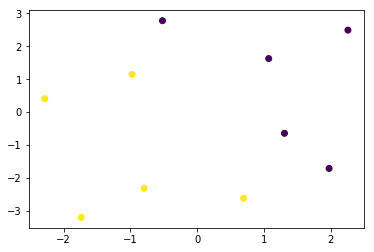

In [4]:
X = np.c_[X1.T,X2.T].T
Y = np.c_[Y1.T,Y2.T].T.reshape(n+m)
plt.scatter(X[:,0],X[:,1],c=Y)

In [5]:
d,A,b = EMD_prob(X1,W1,X1,W1)
write_lpfile(d,A,b)
emd,x1,time = EMD(X1,W1,X2,W2)
print(emd)

0.0


In [7]:
def dist(x,y):
    return np.sum(np.abs(x-y))

def euclid(x,y):
    return np.sum((x-y)**2)

d,A,b = EMD_prob(X1,W1,X2,W2)
d1,A1,b1 = EMD_prob(X1,W1,X2,W2,euclid)
write_lpfile(d,A,b)
emd,x,time = EMD(X1,W1,X2,W2)
time


0.36500000953674316

In [8]:
x.sum()

179.00392444119322

In [91]:
sigms = 1
sigma1 = sigms
sigma2 = sigms
mean1 = np.array([1,1])
mean2 = np.array([-1,-1])

ns = np.array([50,60,70,90,110])
ms = np.array([50,60,70,90,110])
num_of_rep = 5

objs = np.zeros((ns.shape[0],ms.shape[0]))
times = np.zeros((ns.shape[0],ms.shape[0]))

for i in tqdm(range(ns.shape[0])):
    n=ns[i]
    for j,m in enumerate(ms):
        if m < n:
            continue
        X1,W1 = generate_data(mean1,sigma1,n)
        X2,W2 = generate_data(mean2,sigma2,m)
        
        current_obj = np.zeros(num_of_rep)
        current_time = np.zeros(num_of_rep)
        for k in range(num_of_rep):
            current_obj[k],_,current_time[k] = EMD(X1,W1,X2,W2)
        objs[i,j],times[i,j] = current_obj.mean(),current_time.mean()
        
timespd = pd.DataFrame(times,index=ns,columns=ms)
timespd.to_pickle("time_q4.pkl")

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [55]:
times = pd.read_pickle("time_q4.pkl")

ns = times.index
ms = times.columns

absis = []
ords = []
for i,n in enumerate(ns):
    for j,m in enumerate(ms):
        if m < n:
            continue
        absis.append(n*m)
        ords.append(times.iloc[i,j])
absis = np.array(absis)
ords = np.array(ords)

In [56]:
ords = ords[absis.argsort()]
absis = absis[absis.argsort()]

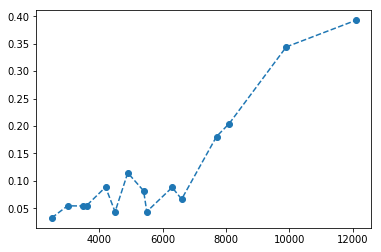

In [68]:
plt.plot(absis,ords,"--o")

In [5]:
import utils as u
import numpy as np
import matplotlib.pyplot as plt


In [6]:
mean1 = np.array([1,1])
mean2 = np.array([-1,-1])
mean3 = np.array([1,-1])
mean4 = np.array([-1,1])

std = 0.4
std1 = np.array([[0.2*std,0],
                 [0,std]])
std2 = 0.5*np.array([[std,0.3*std],
                 [0.3*std,std]])
std3 = 0.7*std
std4 = np.array([[std,0],
                 [0,0.1*std]])

size = 200

X1,_ = u.generate_data(mean=mean1,std=std1,size=size)
X2,_ = u.generate_data(mean=mean2,std=std2,size=size)
X3,_ = u.generate_data(mean=mean3,std=std3,size=size)
X4,_ = u.generate_data(mean=mean4,std=std4,size=size)

Y1 = np.zeros(size)+1
Y2 = np.zeros(size)+2
Y3 = np.zeros(size)+3
Y4 = np.zeros(size)+4

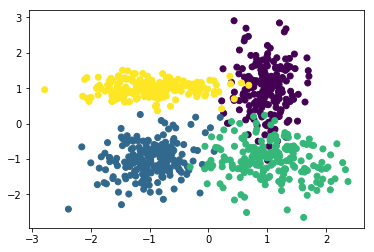

In [7]:
X = np.c_[X1.T,X2.T,X3.T,X4.T].T
Y = np.c_[Y1.T,Y2.T,Y3.T,Y4.T].T.reshape(4*size)
plt.scatter(X[:,0],X[:,1],c=Y)

In [8]:
mean1 = np.array([1,1])
mean2 = np.array([-1,-5])
mean3 = np.array([1,-5])
mean4 = np.array([-1,1])

std = 0.2
std1 =std
std2 = std
std3 = std
std4 = std

size = 200

X1,_ = u.generate_data(mean=mean1,std=std1,size=size)
X2,_ = u.generate_data(mean=mean2,std=std2,size=size)
X3,_ = u.generate_data(mean=mean3,std=std3,size=size)
X4,_ = u.generate_data(mean=mean4,std=std4,size=size)

Y1 = np.zeros(size)+1
Y2 = np.zeros(size)+2
Y3 = np.zeros(size)+3
Y4 = np.zeros(size)+4

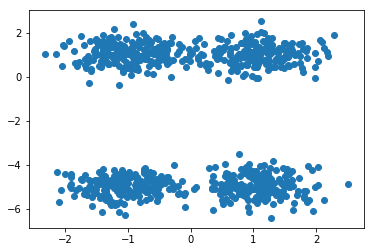

In [10]:
X = np.c_[X1.T,X2.T,X3.T,X4.T].T
Y = np.c_[Y1.T,Y2.T,Y3.T,Y4.T].T.reshape(4*size)
plt.scatter(X[:,0],X[:,1])

In [11]:
#n = X.shape[0]
#
#k1 = 5
#c1 = np.zeros((n,k1))
#kmeans1 = KMeans(n_clusters=k1,init="random")
#clusters1 = kmeans1.fit_predict(X)
#c1[np.arange(n),clusters1]=1
#c1=c1.T
#
#k2 = 4
#c2 = np.zeros((n,k2))
#kmeans2 = KMeans(n_clusters=k2,init="random")
#clusters2 = kmeans2.fit_predict(X)
#c2[np.arange(n),clusters2]=1
#c2=c2.T

c5 = u.get_kmeans_matrix(X,5)
c4 = u.get_kmeans_matrix(X,4)
c3 = u.get_kmeans_matrix(X,3)
c2 = u.get_kmeans_matrix(X,2)

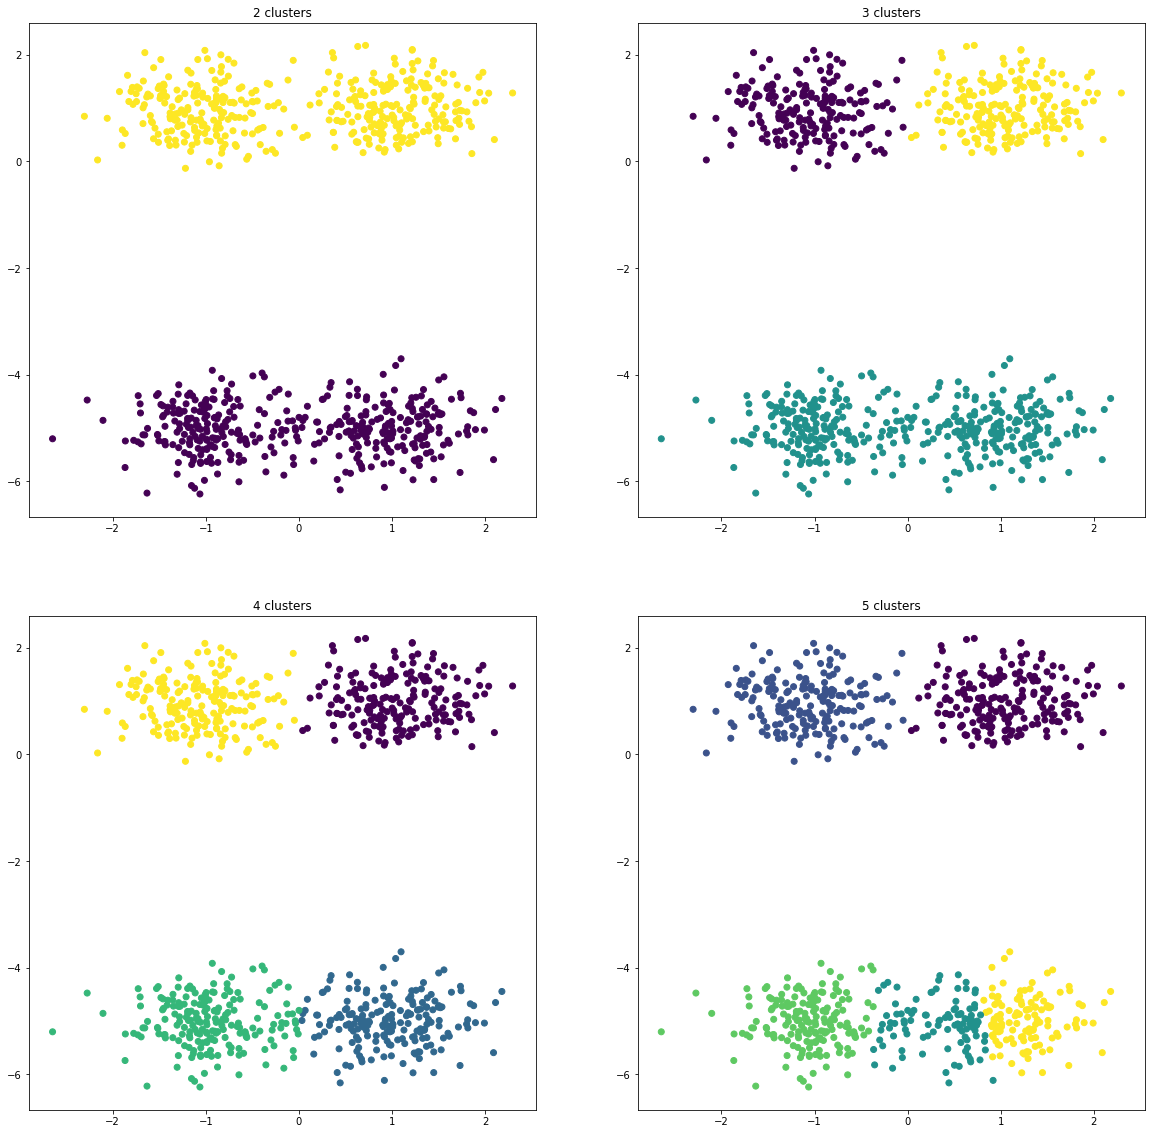

In [63]:
plt.figure(figsize = (20,20))
plt.subplot(221)
plt.title("2 clusters")
plt.scatter(X[:,0],X[:,1],c=c2.argmax(0))
plt.subplot(222)
plt.title("3 clusters")
plt.scatter(X[:,0],X[:,1],c=c3.argmax(0))
plt.subplot(223)
plt.title("4 clusters")
plt.scatter(X[:,0],X[:,1],c=c4.argmax(0))
plt.subplot(224)
plt.title("5 clusters")
plt.scatter(X[:,0],X[:,1],c=c5.argmax(0))

In [12]:
emds_clusters = -1 + np.zeros((4,4))
clusterings = [c2,c3,c4,c5]
for i,c1 in enumerate(clusterings):
    for j,c2 in enumerate(clusterings):
        emds_clusters[i,j] = compare_clusters(c1,c2)

In [13]:
emds_clusters

array([[  0.    ,  99.9975, 199.975 , 228.43  ],
       [ 99.9975,   0.    ,  99.9775, 128.4325],
       [199.975 ,  99.9775,   0.    ,  34.335 ],
       [228.43  , 128.4325,  34.335 ,   0.    ]])

In [17]:
import pandas as pd
df = pd.DataFrame(emds_clusters)
df.values

array([[  0.    ,  99.9975, 199.975 , 228.43  ],
       [ 99.9975,   0.    ,  99.9775, 128.4325],
       [199.975 ,  99.9775,   0.    ,  34.335 ],
       [228.43  , 128.4325,  34.335 ,   0.    ]])

In [6]:
import csv
towrite = ["Ns","Ms","Ds","Times","EMDs"]

with open('times_q4.csv', mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(towrite)                                                      


In [20]:
towrite = ["Ns","Ms","Ds","Times","EMDs"]
to_write2 = [1,2,3]
",".join(to_write2)

TypeError: sequence item 0: expected str instance, int found

In [6]:
import compute_time as ct
from importlib import reload
reload(ct)

<module 'compute_time' from 'D:\\Centrale\\Cours3a\\gmda\\GMDA-Project\\compute_time.py'>

In [11]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ns = []
ms = []
times = []
with open('times_q4.csv',mode="r") as file:
    reader = csv.reader(file)
    for i,row in enumerate(reader):
        if i == 0:
            continue
        ns.append(row[0])
        ms.append(row[1])
        times.append(row[3])

ns = np.array(ns,dtype=float)
ms = np.array(ms,dtype=float)
times = np.array(times,dtype=float)

Text(0, 0.5, 'Time (s)')

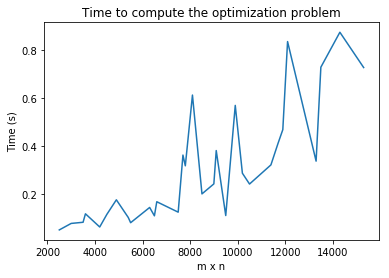

In [65]:
nxm = ns*ms
x = nxm[nxm.argsort()]
y = times[nxm.argsort()]
plt.plot(x,y)
plt.title("Time to compute the optimization problem")
plt.xlabel("m x n")
plt.ylabel("Time (s)")

In [19]:
pd.read_csv("times_q4.csv").values

array([[5.00000000e+01, 5.00000000e+01, 2.00000000e+00, 5.06000042e-02,
        6.60881006e+00],
       [5.00000000e+01, 6.00000000e+01, 2.00000000e+00, 7.75999546e-02,
        7.08836249e+00],
       [5.00000000e+01, 7.00000000e+01, 2.00000000e+00, 8.23999882e-02,
        3.89726487e+00],
       [5.00000000e+01, 9.00000000e+01, 2.00000000e+00, 1.15199947e-01,
        5.87758428e+00],
       [5.00000000e+01, 1.10000000e+02, 2.00000000e+00, 8.05999756e-02,
        2.34352554e+00],
       [5.00000000e+01, 1.30000000e+02, 2.00000000e+00, 1.09200001e-01,
        2.40564399e+00],
       [5.00000000e+01, 1.50000000e+02, 2.00000000e+00, 1.24399948e-01,
        3.02872389e+00],
       [5.00000000e+01, 1.70000000e+02, 2.00000000e+00, 2.00400019e-01,
        4.65307509e+00],
       [5.00000000e+01, 1.90000000e+02, 2.00000000e+00, 1.10400009e-01,
        7.74648732e-01],
       [6.00000000e+01, 6.00000000e+01, 2.00000000e+00, 1.17600012e-01,
        9.02052987e+00],
       [6.00000000e+01, 7.0000